## MULTIVARIATE LINEAR REGRESSION
<b>Author:</b> kevin Mntambo

<b>Description:</b> In this project a linear regression model is built using data from 'salary.csv', that can predict employee salaries using different employee characteristics .Matplotlib / seaborn is used to draw graphs ,pandas to perform exploratory data analysis and statsmodels to train and test the model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats.stats import pearsonr
sns.set()

salary_df = pd.read_csv('../data/salary .csv')
salary_df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


### Exploratory Analysis

In [2]:
salary_df.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64


There is one null value under the salary column.


In [3]:
salary_df.salary.fillna(salary_df.salary.mean(),inplace=True)

Null values are replaced with the mean.

Because salary is a continuous feature, therefore by replacing the null value with the mean ,we preserve the extra information given by the row containing the null value, without changing the overall mean of the salary column.

In [4]:
cols = ['salary','exprior','yearsworked','yearsrank','market']

Q1 = salary_df[cols].quantile(0.25)
Q3 = salary_df[cols].quantile(0.75)
IQR = Q3 - Q1

salary_df = salary_df[~((salary_df[cols] < (Q1 - 1.5 * IQR)) |(salary_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

All extreme values are removed from columns with continuous values.

Text(0.5, 0, 'salary')

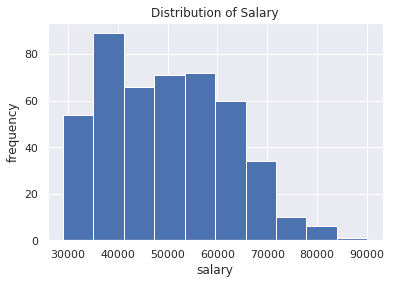

In [5]:
plt.hist(salary_df['salary'])
plt.title('Distribution of Salary')
plt.ylabel('frequency')
plt.xlabel('salary')

Text(0.5, 1.0, 'slary vs yearsworked')

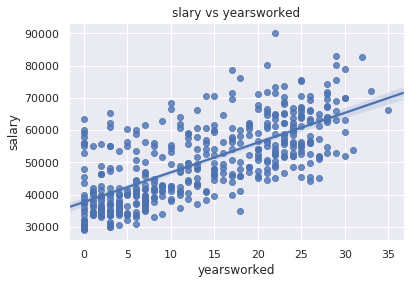

In [6]:

sns.regplot(salary_df['yearsworked'],salary_df['salary']).set_title('slary vs yearsworked')

Yearsworked has a linear relationship with salary, yearsworked is strongly positively correlated with salary, Therefore  yearsworked would be a good candidate for being a feature in the model.

Text(0.5, 1.0, 'salary vs years worked in current possition')

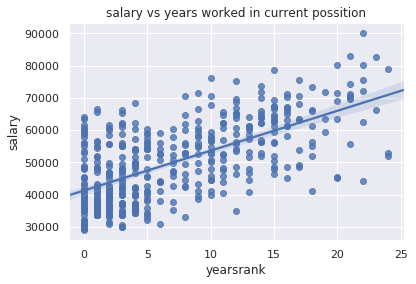

In [7]:
sns.regplot(salary_df['yearsrank'],salary_df['salary']).set_title('salary vs years worked in current possition')

Years worked at current position (yearsrank),has a linear relationship with salary, yearsrank is strongly positively correlated with salary,Therefore  yearsrank would be a good candidate for being a feature in the model.

Text(0.5, 1.0, 'salary vs years absent')

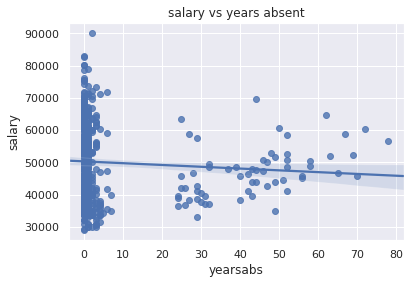

In [8]:
sns.regplot(salary_df['yearsabs'],salary_df['salary']).set_title('salary vs years absent')

There exists a linear relationship between years absent from work (yearsabs) and salary, yearsbas has a weak negative correlation with salary,therefore since the correlation is weak yearsabs might not be a good candidate to be a feature in the model.

Text(0.5, 1.0, 'salary vs market')

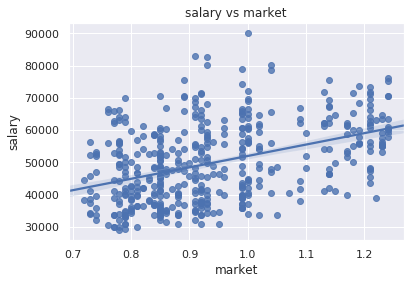

In [9]:
sns.regplot(salary_df['market'],salary_df['salary']).set_title('salary vs market')

Market has a linear relationship with salary, market is strongly positively correlated with salary.Therefore  market would be a good candidate for being a feature in the model.


Text(0.5, 1.0, 'salary vs experience prior')

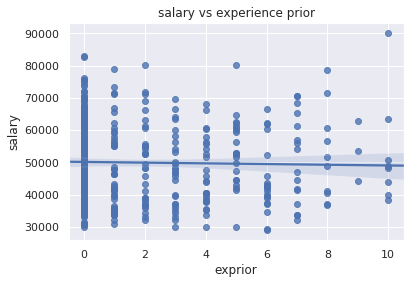

In [10]:
sns.regplot(salary_df['exprior'],salary_df['salary']).set_title('salary vs experience prior')

Years of experience(exprior) is negatively correlated with salary  however the relationship seems weak therefore  exprior might not be a good candidate as a feature for the model.

[Text(0, 0, 'no degree'), Text(0, 0, 'have degree')]

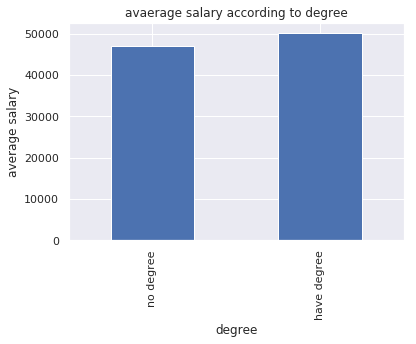

In [11]:
ax= salary_df.groupby(['degree'])['salary'].mean().plot.bar()
ax.set_title('avaerage salary according to degree')
ax.set_ylabel('average salary')
ax.set_xticklabels(['no degree','have degree'])


Those who have a degree on average earn a slightly higher salary than those without a degree.

Degree has  binomial distribution, There is no evidence of a strong correlation between degree and salary, the average salary for 'have degree'(1) and 'no  degree'(0) seem to be similar or close, therefore degree might not be the best candidate for being a feature in the model. 


[Text(0, 0, 'no'), Text(0, 0, 'yes')]

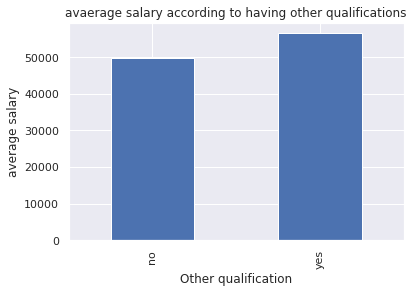

In [12]:
ax= salary_df.groupby(['otherqual'])['salary'].mean().plot.bar()
ax.set_title('avaerage salary according to having other qualifications')
ax.set_ylabel('average salary')
ax.set_xlabel('Other qualification')
ax.set_xticklabels(['no','yes'])


On average those with no other qualifications earn a slightly lower salary than those that do.

Other equal qualifications  have a  binary distribution, there seems to  be enough difference between average salary with no other qualification and average salary with other qualifications to warrant being added as a feature in the model.


[Text(0, 0, 'Junior Employee'), Text(0, 0, 'Manager'), Text(0, 0, 'Executive')]

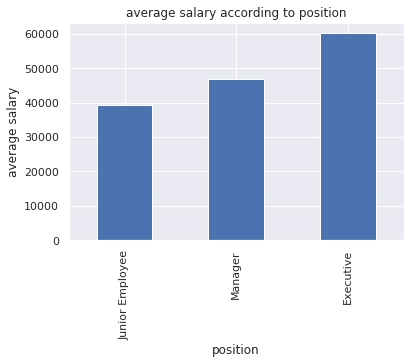

In [13]:
ax= salary_df.groupby(['position'])['salary'].mean().plot.bar()
ax.set_title('average salary according to position')
ax.set_ylabel('average salary')

ax.set_xticklabels(['Junior Employee', 'Manager', 'Executive'])
    

There is a correlation between the position and the average salary, the higher the rank of that position the higher the salary.

There seems to  be enough difference between average salary categories to warrant being added as a feature in the model.


[Text(0, 0, 'Engineering'),
 Text(0, 0, 'Finance'),
 Text(0, 0, 'Human Resources'),
 Text(0, 0, 'Marketing')]

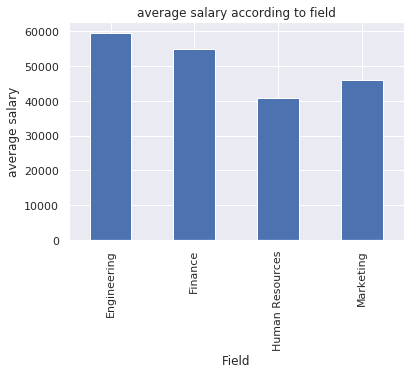

In [14]:
ax= salary_df.groupby(['Field'])['salary'].mean().plot.bar()
ax.set_title('average salary according to field')
ax.set_ylabel('average salary')

ax.set_xticklabels(['Engineering', 'Finance', 'Human Resources', 'Marketing'])
    
    


There is a correlation between the average salary and the field , more technical fields like  engineering and finance seem to pay more on average than more creative and humanities fields like marketing  and human resources.

There seems to  be enough difference between average salary categories to warrant being added as a feature in the model.


 ### Feature Engineering and Selection

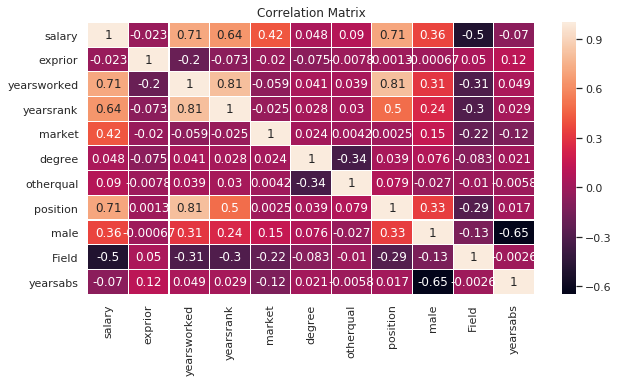

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(salary_df.corr(method='pearson'), annot=True, ax=ax, linewidths=0.1)
plt.title('Correlation Matrix');

This correlation matrix shows salary to have a strong to medium correlation with yearsworked, yearsrank , position, market,male and field.
The correlation matrix shows correlations between years worked, years rank and  position.


In [16]:
independent_variables = salary_df.columns.tolist()
independent_variables.remove('salary')

All possible features are put into a list.

In [17]:
pval=[]
for item in independent_variables:
    pval.append(pearsonr(salary_df[item],salary_df['salary'])[1])
    
pval_df = pd.DataFrame(pval,
                 index=independent_variables,
                 columns=['Pval'])
pval_df

,Pval
exprior,6.158193e-01
yearsworked,1.412818e-72
yearsrank,2.244234e-55
market,4.938685e-21
degree,3.071620e-01
otherqual,5.304954e-02
position,8.731098e-72
male,1.090673e-15
Field,9.069571e-31
yearsabs,1.335234e-01


A p-value is a measure of the probability that an observed difference could have occurred just by random chance. A p-value less than 0.05 is considered strong evidence against the null hypothesis since there is less than a 5% probability that the null hypothesis is correct and the results are random.


All the P-values of the correlation coefficients are well below 0.5 therefore we can reject the null hypothesis and and assume that these correlation coefficients are not by chance.


In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
imp_df= salary_df.drop(columns=['salary'])
X = imp_df.assign(const=1)

pd.Series([variance_inflation_factor(X.values,i)for i in range(X.shape[1])],index=X.columns)

exprior          1.404132
yearsworked     11.480786
yearsrank        4.425730
market           1.124005
degree           1.169503
otherqual        1.154794
position         4.892143
male             2.380219
Field            1.209890
yearsabs         2.126143
const          110.361414
dtype: float64

Variance inflation factor (VIF), measures multicollinearity,generally a VIF score of 10 and higher might cause problems for the model as the feature might be too correlated with other features, this might in turn cause the model to be too sensitive to certain changes as there will be multiple features measuring the same phenomenon.

Therefore yearsworked might not be the best candidate as it has too high of correlation with the other features.


In [19]:
chosen= ['Field','yearsrank', 'position','market','male' ]
for i in chosen:
    independent_variables.remove(i)
    
salary_df.drop(independent_variables, axis=1,inplace=True)  

##### feature selection
In order to select features the following criteria will be used:

correlation with salary must be higher than .5 .<br>
P value based on correlation must be below .05<br>
and the variance inflation factor (VIF) must be below  10.

Therefore, all other feature columns are dropped except for  yearsrank ,position, market ,male and field since according to our criteria these are the best candidates to fit the model with.


 

In [20]:
salary_df['Field'] = salary_df['Field'].replace([1, 2, 3, 4], ['Engineering', 'Finance', 'Human Resources', 'Marketing'])
salary_df = pd.get_dummies(salary_df).drop('Field_Human Resources', axis=1)


One hot encoding is  a process that turns our categorical data into a format more suited for our machine learning model to understand since the learning algorithm for MLR does not know how to deal with variables with a categorical relationship, rather it assumes that variables have a numeric relationship. ie, in the Field column, the  nodel  will not be able to  tell that 1 is for 'engineering' and 4 is 'human resources' rather  it will assume  1 stands for 1 field and 4 to mean 4 fields.

Therefore the  categorical feature 'Field' is split into dummy variables or columns for each category  in the 'Field' column. Each column contains “0” or “1” corresponding to which column it has been placed.

The Dummy Variable trap is when you give the model too much information.Because dummy variables are binary , we know what's there and what's  not there in that specific category, using this we can extrapolate what the values of the last category will be. Therefore the inclusion of all dummy variables (categories) of a variable will result in two or more of these dummy variables being highly correlated.

The dummy variable 'Field_Human Resources'  is dropped from the dataframe to avoid the dummy variable trap.


In [21]:
salary_df['position'] = salary_df['position'].replace([1, 2, 3], ['Junior Employee', 'Manager', 'Executive'])
salary_df = pd.get_dummies(salary_df).drop('position_Executive', axis=1)

The categorical feature 'position' is split into dummy variables or  columns for each category  in the 'Field' column. Each column contains “0” or “1” corresponding to which column it has been placed.

The dummy variable 'position_Executive' is dropped from the dataframe to avoid the dummy variable trap.

In [22]:
salary_df.head()

,salary,yearsrank,market,male,Field_Engineering,Field_Finance,Field_Marketing,position_Junior Employee,position_Manager
0,53000.0,0,1.17,1,0,0,0,1,0
1,58000.0,0,1.24,1,0,1,0,1,0
2,45500.0,0,1.21,1,0,0,0,1,0
3,35782.0,1,0.99,1,0,0,1,1,0
4,34731.0,2,0.91,1,0,0,1,1,0


The final dataframe that will be used for modeling.

### Model Train and Test

In [23]:
features = salary_df.columns.tolist()

features.remove('salary')
features

['yearsrank',
 'market',
 'male',
 'Field_Engineering',
 'Field_Finance',
 'Field_Marketing',
 'position_Junior Employee',
 'position_Manager']

This is the list of the features  that will be used to train the model.

In [24]:

X = salary_df[features].values
y = salary_df['salary'].values
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=33)


The data is split into training and test data.


In [25]:
salary_df.describe()

,salary,yearsrank,market,male,Field_Engineering,Field_Finance,Field_Marketing,position_Junior Employee,position_Manager
count,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,49943.252365,7.010799,0.942181,0.738661,0.231102,0.239741,0.272138,0.282937,0.328294
std,12117.229387,6.307583,0.143377,0.439840,0.421993,0.427387,0.445542,0.450913,0.470100
min,29000.000000,0.000000,0.720000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39774.080080,2.000000,0.840000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48681.000000,5.000000,0.910000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,58965.500000,12.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,90082.000000,24.000000,1.240000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Most feartures have a range of 0 - 1 however yearsrank and market,have a different scale , (0-24) and (0.72-1.24) respectively.

In [26]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

All features are transformed, so that all features share the same scale , between 0 and 1.

In [27]:
x_train =sm.add_constant(x_train)
x_test =sm.add_constant(x_test)
model =sm.OLS(y_train, x_train).fit()


The model is fitted.

### Evaluate model

In [28]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     203.7
Date:                Tue, 09 Feb 2021   Prob (F-statistic):          1.23e-119
Time:                        14:12:42   Log-Likelihood:                -3216.9
No. Observations:                 324   AIC:                             6452.
Df Residuals:                     315   BIC:                             6486.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.126e+04   1075.065     38.379      0.0


Field_engineering and Field engineering are not statistically significant. they have P values over 0.5.

R-squared tells us that 83% of variance in employee salaries is  accounted for b y this model.





In [29]:
from sklearn.metrics import mean_absolute_error

print('The mean absolute error for the training dataset is:',mean_absolute_error(y_train,  model.predict(x_train)))


The mean absolute error for the training dataset is: 3849.615712722851


The Mean absolute error(MAE) represents the difference between the original and predicted values extracted by averaging the absolute difference over the data set

In [30]:
print('The mean absolute error for the test dataset is:',mean_absolute_error(y_test,  model.predict(x_test)))

The mean absolute error for the test dataset is: 4059.003329798086


The residual of an observed value is the difference between the observed value and the estimated value of the quantity of interest (for example, a sample mean). 
most of these values are negative , meaning that for  the most part the model is  predicting  below the value.



Text(0.5, 1.0, 'residue plot for training dataset')

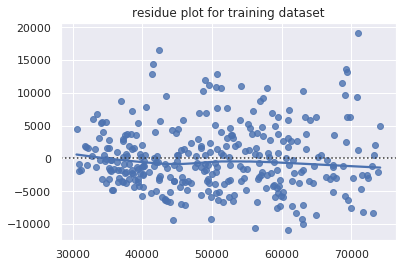

In [31]:
sns.residplot(x=model.predict(x_train), y=y_train, lowess=True).set_title('residue plot for training dataset')


The line of best fit for the fitted values lies below the actual values , this  means that the fitted values tend to be smaller than the actual values.


Text(0.5, 1.0, 'residue plot for test dataset')

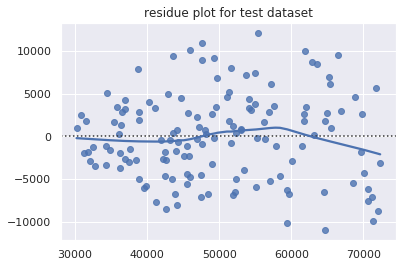

In [32]:

sns.residplot(x=model.predict(x_test), y=y_test, lowess=True).set_title('residue plot for test dataset')


The model  seems to have more variance in its predictions on the test date, it also seems to do better for  the lower to mid predictions , but does increasingly badly for the higher the predictions.This might indicate overfitting.




### Benchmark with cross-validation model

In [33]:
from statsmodels.tools.eval_measures import rmse


train_rmse = rmse(y_train, model.predict(x_train))
test_rmse = rmse(y_test, model.predict(x_test))

In [34]:

print('The root mean squared error for the training data is: ',train_rmse)

The root mean squared error for the training data is:  4962.7271677055305


In [35]:

print('The root mean squared error for the training data is: ',test_rmse)

The root mean squared error for the training data is:  5076.530854076945


In [36]:

print('The difference between the RMSE of the training data and that of the test data : ',(1-train_rmse/test_rmse)*100)

The difference between the RMSE of the training data and that of the test data :  2.2417609513792014



The difference/variance  in  the RMSE is lower than 5%(2.4%),therefore we can conclude that the extent of overfitting is small enough for us to maintain confidence in the may model to perform well in real world applications.


### conclusion


Overall this is a good model , accounts for 83% of the variation in employee salary, it performs slightly worse on test data , however not too bad , to be ruled off as overfitting,one issue is might be that two of my features are statistically insignificant,maybe an area of improvement would be to find a way to deal or remove these features without totally losing the information provided by the field column. 
